<a href="https://colab.research.google.com/github/marcosilvaa/dados_estudos/blob/main/Estat%C3%ADstica_para_Finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas

In [ ]:
!pip install yfinance 
!pip install vectorbt
!pip install sweetviz

In [ ]:
# importando bibliotecas
import pandas as pd
import numpy as np

from scipy import stats
import pylab
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import yfinance as yf
import vectorbt as vbt

import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import sweetviz as sv 

In [ ]:
a = np.random.randint(50, size=30)
b = np.random.randint(50, size=30)

ab = zip(a,b)

fig = px.scatter(ab, x=a,y=b, template="simple_white", width=400, height=400)
fig.update_layout(paper_bgcolor = "#f7f8fa", margin=dict(l=20,r=20,t=20,b=20))

**Considerando a complexidade do universo de dados do mercado financeiro...**

* Padronizar as interpretações

* Magnitude do relação/efeito

* Probabilidade de que o padrão se repita

In [ ]:
corr, p = stats.pearsonr(a, b)
print('Correlação de Pearson, r=%.3f' %corr, 'p=%.3f' %p)

Correlação de Pearson, r=-0.137 p=0.470


---

# Análise Exploratória de Dados: EDA


###*Estatística Descritiva*

O primeiro passo para se analisar um *dataset* é ver como está a sua distribuição, por isso a primeira coisa feita neste notebook foi um gráfico de dispersão -> **Scatter Plot**  


## Distribuição dos dados

### Medidas de posição e dispersão 

A distribução dos dados é o ponto chave para praticamente tudo que entendemos por estatística.

Apesar disso, muitas vezes é ignorada nos modelos, que podem não funcionar por causa de poucas observações que distorcem a distribuição dos dados.

## Distribuição normal

###Entendendo o comportamento

Medidas paramétricas (médias, desvios, intervalos de confiança, coeficiente de variação) funcionam bem.

A distribuição *Normal*, também chamada de Gaussiana, possui um formato de "Sino". A maioria dos eventos observados possuem uma distribuição "normal". 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



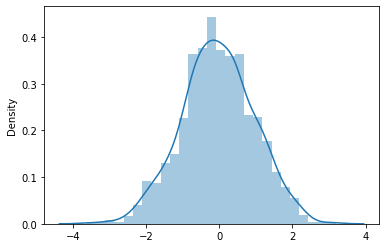

In [ ]:
normal_dist = np.random.normal(0,1,1000) #---> (Média, Desvio Padrão, Qtd Valores) 
normal_fig01 = sns.distplot(normal_dist, hist=True, kde=True)

Uma das caracteristicas da distribuição normal, é que a média, mediana e moda serão iguais. Como uma distribuição dificilmente será "perfeita", estes valores vão ser aproximados.

####Medidas de posição: Média, Mediana, Moda

* Média = média aritmética de um conjunto de números.
* Mediana = é o valor central desse conjunto, ou seja, o que separa a metade superior da inferior.
* Moda = é o valor que apresenta maior frequência dentro do conjunto.

In [ ]:
print(np.mean(normal_dist)) # imprime a média
print(np.median(normal_dist)) #imprime a mediana 
print(stats.mode(normal_dist))  #imprime a moda

-0.03691078536342746
-0.04510214576514093
ModeResult(mode=array([-3.62289385]), count=array([1]))


<ipython-input-74-7590843b96b3>:3: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [ ]:
# imprimindo valores arrendondados
print(round(np.mean(normal_dist),2)) # imprime a média
print(round(np.median(normal_dist),2)) #imprime a mediana 

-0.04
-0.05


Plotando agora em um gráfico interativo com a plotly.

In [ ]:
fig01 = px.histogram(normal_dist, color_discrete_sequence=["lightseagreen"])
fig01.add_vline(x=np.mean(normal_dist), line_width=3, line_color="red")
fig01.add_vline(x=np.median(normal_dist), line_width=3, line_dash="dash", line_color="blue")

fig01.update_layout(width=400, height=400, template="simple_white",
                    paper_bgcolor="#f7f8fa", margin=dict(l=20,r=20,t=20,b=20), showlegend=False)

**Como saber se uma distribuição é normal?**

Para isso realizamos diferentes testes como os apresentados à seguir.

#### Testes de normalidade (caindo em desuso)

In [ ]:
teste_normalidade = stats.normaltest(normal_dist)
print(teste_normalidade)

NormaltestResult(statistic=0.6263054820664015, pvalue=0.7311382292312396)


* pvalue -> quando o resultado é acima de 0.05 significa que os dados são considerados normais.

Este tipo de teste está caindo em desuso pois são extremamente sensíveis quando temos um amplo conjunto de dados. 

##### Sensibilidade do teste

In [ ]:
import random 

random.seed(1)
qtd_dados = 30
lista_numeros = [random.randrange(1, 50, 1) for i in range(qtd_dados)]
shapiro_test = stats.shapiro(lista_numeros)
print("Lista com",len(lista_numeros),'dados')
shapiro_test

# Veja que temos um conjunto de dados normal (p> 0.05)

Lista com 30 dados


ShapiroResult(statistic=0.9379926919937134, pvalue=0.08032047003507614)

In [ ]:
# Observa a média
print(np.mean(lista_numeros))

25.066666666666666


In [ ]:
# Vamos dobrar o número de dados, mas repetindo a mesma lista, ou seja, normalidade deveria ser a mesma
lista_numeros.extend(lista_numeros)
shapiro_test = stats.shapiro(lista_numeros)
print("Lista com",len(lista_numeros),'dados')
shapiro_test

# Veja que o pvalue < 0.05

Lista com 60 dados


ShapiroResult(statistic=0.9343811273574829, pvalue=0.003061881521716714)

In [ ]:
# Media se mantém já que só repeti os numeros
print(np.mean(lista_numeros))

25.066666666666666


Por mais que a média se manteve, mas a normalidade caiu, tornando o método um tanto obsoleto.

### Medidas de posição: Quantis

São pontos de corte que dividem intervalos de distribuições em intervalos contínuos com probabilidades iguais.

Essa separação poder ser feita em N Subdivisões, portanto, se for dividido em quatro partes, são chamados de quartiles, já em cem partes, percentiles.

#### Quantile-Quantile Plot (Q-Q Plot)

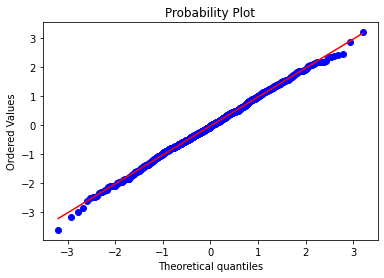

In [ ]:
stats.probplot(normal_dist, dist="norm", plot=pylab)
pylab.show()

Este gráfico compara a distribuição do nosso conjunto de dados(azul), com uma distribuição de um conjunto teórico "perfeito" (vermelho). Quanto mais próximo do conjunto teórico, maior é a normalização dos nossos dados. 

####Boxplot
Uma ótima maneira de visualizar a distribuição dos dados. Dessa forma nos é mostrado em `Quartiles`, ou seja, dividido em 4 partes. Se dermos um zoom in nesse gráfico, podemos ver a linha tracejada que nos mostra a média do nosso conjunto de dados, assim como a linha normal nos mostra a mediana. 

A parte de cima da caixa mostra o valor do Quantile 3, a parte de baixo o valor do Quantile 1. Já as linhas dos extremos, nos mostra o limite do que é considerado "Normal" dentro do conjunto de dados, qualquer valor além desses limites são considerados "outliers" e devem ser eliminados para não distorcer o resultado da nossa análise.

In [ ]:
fig02 = go.Figure()
fig02.add_trace(go.Box(y=normal_dist, boxpoints='all', boxmean='sd', name='<b>Normal distribution', marker_color = 'blue'))
fig02.update_layout(width=400, height=400, template = 'simple_white',
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=False)

In [ ]:
# Diferentes formas de imprimir os resultados
print(np.quantile(normal_dist, 0.25)) #-> Dividindo em 4 partes, 0.25 é o equivalente a 1/4
print(np.percentile(normal_dist, 25)) #-> Dividindo em 100 partes, 25 é o equivalente a 1/4 ou 25%

-0.6864442053991393
-0.6864442053991393


In [ ]:
print(np.quantile(normal_dist, 0.5)) #-> Dividindo em 4 partes, 0.25 é o equivalente a 1/4
print(np.percentile(normal_dist, 50)) #-> Dividindo em 100 partes, 25 é o equivalente a 1/4 ou 25%

-0.04510214576514093
-0.04510214576514093


A bilbioteca Pandas tem um método chamado `describe()` que também nos retorna essas informações.

In [ ]:
df_normal_dist = pd.DataFrame(normal_dist)
df_normal_dist.describe()

,0
count,1000.000000
mean,-0.036911
std,0.997069
min,-3.622894
25%,-0.686444
50%,-0.045102
75%,0.612585
max,3.197733


####Skewness -> Assimetria

<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="800" align="left"/>

In [ ]:
stats.skew(normal_dist)

-0.05945735438694208

Para o mercado financeiro, é interessante obter uma assimetria negativa para retornos diários, pois nos garante maior quantidade de retornos positivos. A média dos retornos encontra-se proximo de zero, porem a moda encontra-se cada vez mais a direita do gráfico.

### **Medidas de dispersão (amplitude, desvios padrão e médio, coeficiente de variação e intervalo de confiança)**

<img src="https://i0.wp.com/alvarezsolucoesdigitais.com/wp-content/uploads/2020/02/Estat%C3%ADstica-B%C3%A1sica-Que-Voc%C3%AA-PRECISA-Saber-Para-A-Ci%C3%AAncia-De-Dados-08.png?resize=1024%2C550&ssl=1" width="500" align="center"/>


Em roxo e rosa, encontram-se 95 dos valores, ou seja, 95% de probabilidade dos valore estarem ali concentrados.

####Amplitude




In [ ]:
#Amplitude para alvos/stops
amplitude = normal_dist.max() - normal_dist.min()
amplitude

6.820626659666576

#### Desvio Padrão -> Standard Deviation

O desvio padrão é extremamente importante pois nos mostra a volatilidade do ativo, é uma medida que nos mostra como os dados estão dispersos ao redor da média. Dessa forma, quando é calculado o desvio padrão com a média de diferentes grupos, obtem-se mais informações para avaliar e diferenciar seus comportamentos.

* Bandas de Bollinger -> Indicador de volatilidade, por padrão, uma média de 20, com dois desvios padrão acima e dois abaixo. 

In [ ]:
# Desvio padrão do conjunto de dados
# Sharpe Raio, bandas de bollinger são baseados em desvio padrão.

desvio_padrao = np.std(normal_dist, ddof=True)  #---> DDOF = Degrees of Freedom
desvio_padrao

0.9970685670094909

O desvio padrão depende da magnitude do intervalo de preço, quando se trata de um ativo de `R$5,00` que varia até `R$10,00` teremos um nível de desvio, porém quando se trata do desvio padrão de um preço de imóveis, que podem variar na casa de milhões, teremos uma medida bem maior.

Para isso, normalizazmos os valores da seguinte forma:

In [ ]:
# coeficiente de variação. --> Dividimos o desvio padrão pela média da distribuição
# interessante para comparar e avaliar a consistência 

normal_dist.std(ddof=True)/normal_dist.mean()*100

-2701.2932864804943

In [ ]:
# erro padrão da média 
stats.stats.sem(normal_dist)

<ipython-input-97-df7946c4ec46>:2: DeprecationWarning:

Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



0.03153007655110212

In [ ]:
#intervalo de confiança -> 95% 
# Probabilidade de 95% da média real estar nesse intervalo

IC_95 = stats.t.interval(confidence=0.95, df=len(normal_dist)-1, loc=np.mean(normal_dist), scale=stats.sem(normal_dist))
IC_95

(-0.09878356185236668, 0.024961991125511757)

###Curtose (Kurtosis)
 <img src="https://www.researchgate.net/profile/Attila-Bonyar/publication/298415862/figure/fig1/AS:340236723867648@1458130164255/Illustration-of-the-skewness-and-kurtosis-values-and-how-they-correlate-with-the-shape-of_W640.jpg" width="600" align="center"/>

Essa métrica nos mostra a magnitude da frequência da média, ou seja, quanto maior o número de dados próximos à média, maior será o valor da Kurtosis.

In [ ]:
stats.kurtosis(normal_dist, fisher=True)

0.00884836266430522